In [1]:
# Imports
# ---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl

register_matplotlib_converters()

# File locations
# ----------------
the_gases = './oxaria/data/raw/1oxaria/json/gap_filling/batch_2_feb21_may21/'
pngs = './oxaria/data/pngs/'

In [2]:
# Load the df
# -------------
oxaria1_pm = pd.read_feather(
    the_gases+'oxaria1_pm_q12021_gf.ftr').set_index(['tag', 'rec'])

In [4]:
oxaria1_pm.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10228251 entries, ('scs-bgx-536', Timestamp('2021-01-01 00:00:02+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-05-31 23:59:55+0000', tz='UTC'))
Data columns (total 44 columns):
 #   Column                Dtype  
---  ------                -----  
 0   val.mtf1              float32
 1   val.pm1               float32
 2   val.mtf5              float32
 3   val.pm2p5             float32
 4   val.bin:0             float32
 5   val.bin:1             float32
 6   val.bin:2             float32
 7   val.bin:3             float32
 8   val.bin:4             float32
 9   val.bin:5             float32
 10  val.bin:6             float32
 11  val.bin:7             float32
 12  val.bin:8             float32
 13  val.bin:9             float32
 14  val.bin:10            float32
 15  val.bin:11            float32
 16  val.bin:12            float32
 17  val.bin:13            float32
 18  val.bin:14            float32
 19  val.bin:15            floa

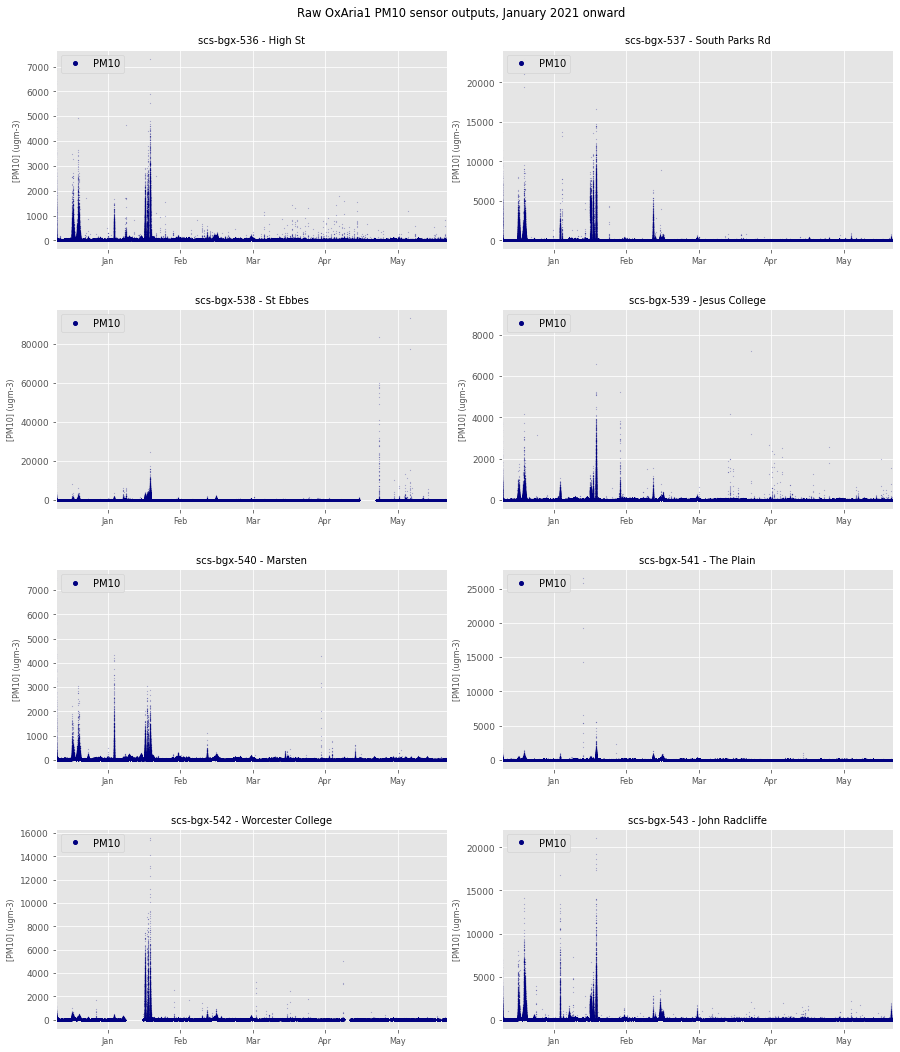

In [3]:
# PM10 ts plot
# -------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 PM10 sensor outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_pm.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm10', c='navy', linewidth=0.5, marker='o', ms=0.1, ls='', label='PM10', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM10] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria1_pm10_raw_sensor_q12021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()

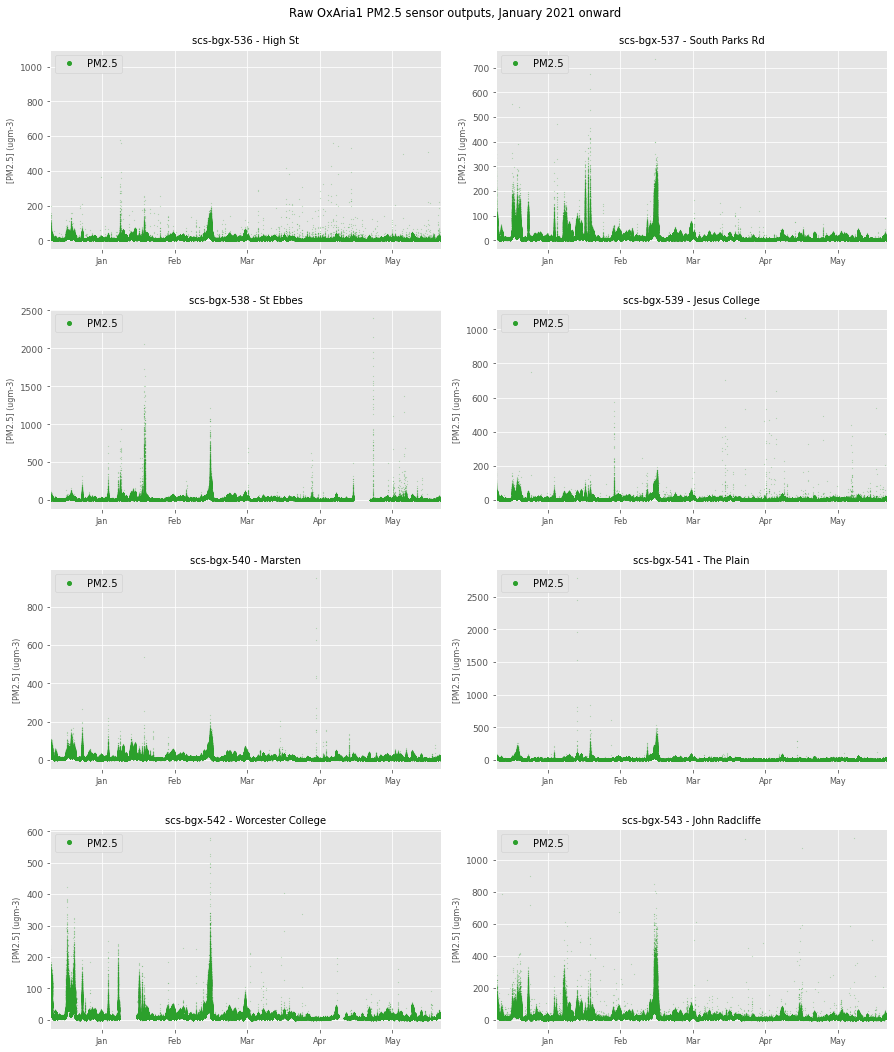

In [4]:
# PM2.5 ts plot
# --------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 PM2.5 sensor outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_pm.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm2p5', c='tab:green', linewidth=0.5, marker='o', ms=0.1, ls='', label='PM2.5', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM2.5] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria1_pm25_raw_sensor_q12021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()

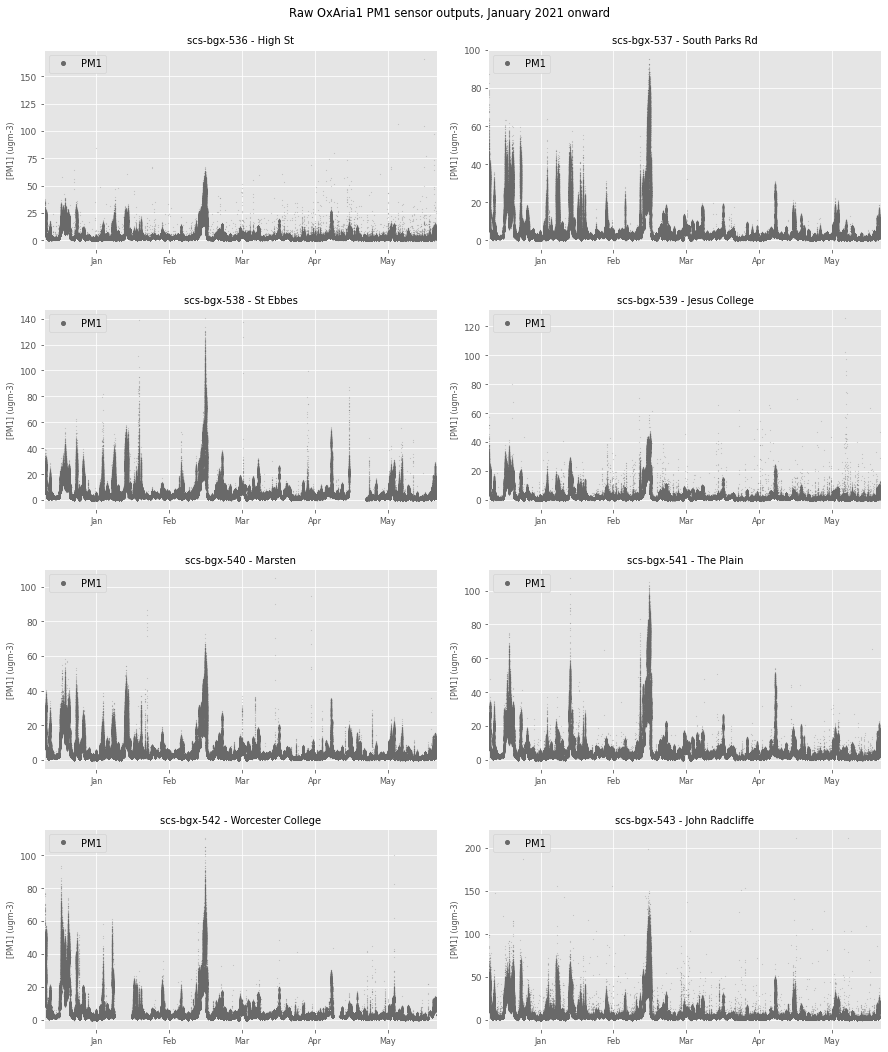

In [5]:
# PM1 ts plot
# ------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2021, 6, 1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria1 PM1 sensor outputs, January 2021 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria1_pm.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm1', c='dimgrey', linewidth=0.5, marker='o', ms=0.1, ls='', label='PM1', ax=ax, legend=True,
             zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM1] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.13, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria1_pm1_raw_sensor_q123021_ts.png')
plt.show()

for ax in axes_list:
    ax.remove()